# Set up your local environment for data science coding

In [1]:
import pandas as pd

In [2]:
player_df = pd.read_csv("player_data.csv")
player_df.head()

,ID,points,possessions,team_pace,Unnamed: 4,Unnamed: 5,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,NaN,NaN,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,NaN,NaN,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,NaN,NaN,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,NaN,NaN,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,NaN,NaN,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38


# Data cleansing part 1 - Find missing values

In [3]:
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
Unnamed: 4     46
Unnamed: 5     46
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [4]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           46 non-null     int64  
 1   points       43 non-null     float64
 2   possessions  43 non-null     float64
 3   team_pace    43 non-null     float64
 4   Unnamed: 4   0 non-null      float64
 5   Unnamed: 5   0 non-null      float64
 6   GP           39 non-null     float64
 7   MPG          40 non-null     float64
 8   TS%          45 non-null     float64
 9   AST          45 non-null     float64
 10  TO           45 non-null     float64
 11  USG          45 non-null     float64
 12  ORR          45 non-null     float64
 13  DRR          45 non-null     float64
 14  REBR         45 non-null     float64
 15  PER          36 non-null     float64
dtypes: float64(15), int64(1)
memory usage: 5.9 KB


# Data cleansing part 2 - Drop columns and rows

In [5]:
player_df.dropna(axis="columns", inplace=True, how="all")
player_df.isna().sum()

ID              0
points          3
possessions     3
team_pace       3
GP              7
MPG             6
TS%             1
AST             1
TO              1
USG             1
ORR             1
DRR             1
REBR            1
PER            10
dtype: int64

In [6]:
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,9,NaN,NaN,NaN,54.0,31.7,0.577,24.6,14.4,35.7,2.5,14.1,-4.6,4.68
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN


Rows entfernen mit tresh(old) Parameter für Mindestanzahl nicht-leerer Spalten:

In [7]:
player_df.dropna(inplace=True, thresh=12)
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
9,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
10,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


Index reparieren

In [8]:
player_df.reset_index(drop=True, inplace=True)
player_df

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
0,1,1893.0,1251.8,97.8,63.0,33.9,0.569,17.2,11.5,26.1,4.7,23.3,7.8,10.90
1,2,1386.0,1282.5,110.5,58.0,32.5,0.511,24.8,9.7,26.9,6.1,0.9,10.7,27.30
2,3,1405.0,1252.3,105.8,55.0,36.3,0.605,25.7,13.9,28.1,4.5,4.9,1.8,NaN
3,4,1282.0,1235.9,100.7,54.0,37.6,0.636,29.5,11.0,22.3,4.8,4.6,5.6,22.35
4,5,1721.0,1254.0,105.7,59.0,30.5,0.589,22.8,9.9,24.6,1.2,8.4,12.1,28.38
5,6,1004.0,1322.4,102.1,57.0,36.3,0.574,20.3,13.5,31.0,1.2,20.5,3.4,9.83
6,7,1920.0,1207.6,109.8,55.0,37.0,0.573,26.0,13.1,30.7,0.0,10.3,-2.6,8.71
7,8,1353.0,1348.1,112.2,57.0,NaN,0.574,24.4,11.3,26.3,5.5,5.8,-2.2,NaN
8,10,1468.0,1400.9,93.7,61.0,35.6,0.547,22.9,12.2,22.7,5.8,6.4,-2.9,NaN
9,11,1856.0,1303.8,93.4,55.0,33.6,0.563,28.9,14.7,26.7,1.4,17.3,4.3,9.67


In [9]:
player_df.describe()

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
count,42.000000,42.000000,42.000000,42.000000,36.000000,37.00000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,33.000000
mean,23.738095,1592.380952,1346.323810,106.526190,59.861111,35.27027,0.596357,26.221429,13.083333,30.478571,4.280952,14.850000,8.497619,22.594242
std,13.826555,351.876707,214.503887,6.676791,5.576239,1.91135,0.029284,5.199275,2.038282,4.919079,2.074025,7.277538,4.995876,7.255338
min,1.000000,183.000000,147.300000,89.700000,48.000000,30.50000,0.511000,14.800000,9.200000,16.500000,0.000000,0.900000,-2.900000,8.710000
25%,12.250000,1390.750000,1283.650000,102.400000,55.750000,34.10000,0.572250,23.275000,11.350000,26.975000,2.925000,8.475000,5.225000,20.120000
50%,23.500000,1680.000000,1369.800000,106.800000,60.500000,35.40000,0.604000,27.200000,13.500000,30.650000,4.650000,16.800000,9.150000,24.230000
75%,35.750000,1826.250000,1444.050000,111.950000,64.000000,36.90000,0.618750,30.550000,14.775000,34.850000,5.900000,20.325000,12.875000,28.380000
max,46.000000,2062.000000,1542.000000,118.800000,69.000000,38.80000,0.645000,33.200000,16.200000,36.700000,8.300000,29.400000,16.400000,34.260000


# Data exploration part 1 - Check for outliers

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

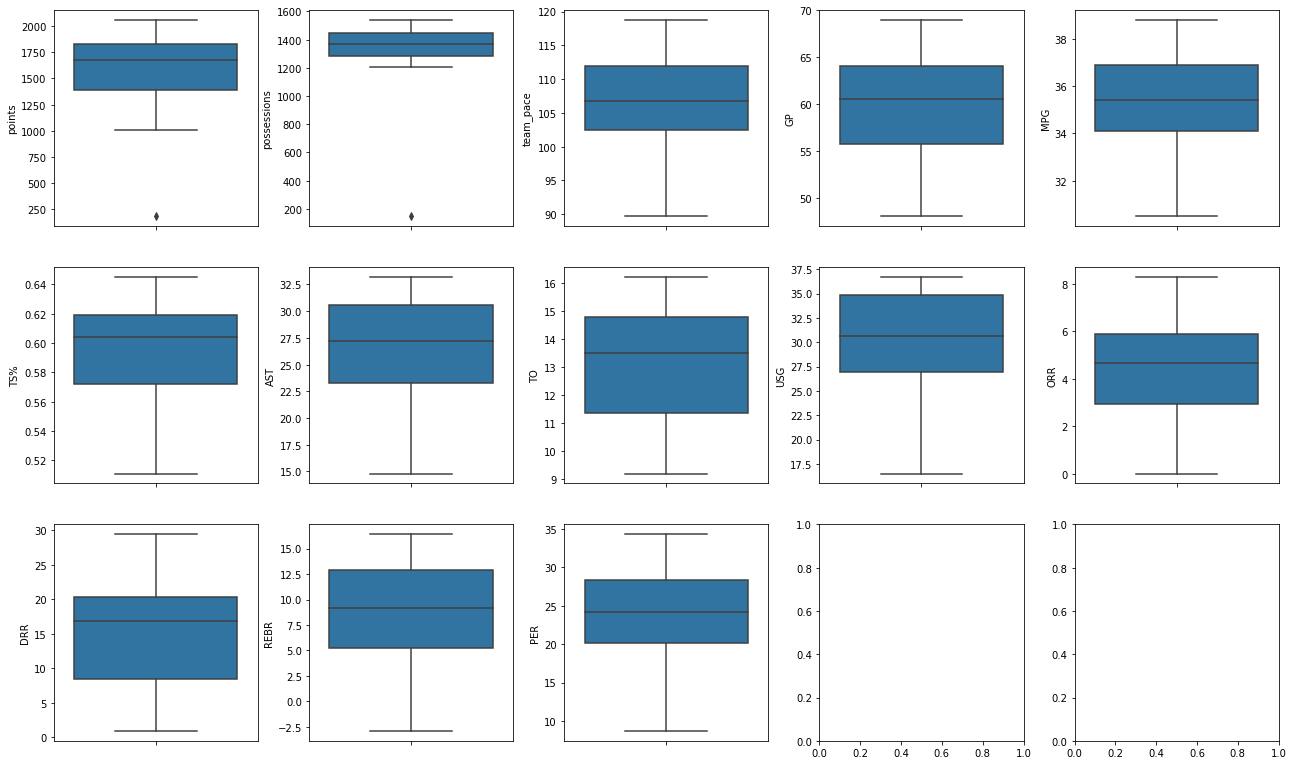

In [11]:
cols = list(player_df.iloc[:, 1:])

fig, axes = plt.subplots(3, 5, figsize=(18, 11))

fig.tight_layout(pad=2.0)

for i in range(len(cols)):
    sns.boxplot(ax=axes[i//5, i%5], y=player_df[cols[i]])

In [12]:
points_outlier = player_df['points'].idxmin()
points_outlier

35

In [13]:
possession_outlier = player_df['possessions'].idxmin()
possession_outlier

35

Die beiden Ausreißer bei Points und Possessions sind der gleiche Datensatz. => Hinfort damit!

In [14]:
player_df.drop(player_df.index[points_outlier], inplace=True)

player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
36,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
37,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
38,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
39,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
40,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
41,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76


In [15]:
player_df.reset_index(drop=True, inplace=True)

player_df.tail(10)

,ID,points,possessions,team_pace,GP,MPG,TS%,AST,TO,USG,ORR,DRR,REBR,PER
31,36,2062.0,1505.7,111.5,NaN,37.0,0.620,29.8,15.6,36.2,4.9,23.9,14.7,27.86
32,37,1845.0,1435.7,113.1,69.0,36.9,0.634,33.2,14.0,36.5,4.1,21.5,16.4,34.26
33,38,1778.0,1526.4,109.3,66.0,34.9,0.612,30.6,15.9,35.9,5.5,18.8,13.7,28.65
34,39,1901.0,1444.1,109.7,67.0,36.5,0.609,27.2,14.8,35.5,5.0,21.8,8.9,20.12
35,41,2030.0,1431.0,112.3,68.0,37.0,0.618,32.5,15.3,34.5,5.7,15.7,13.2,30.07
36,42,1631.0,1465.7,110.1,66.0,37.5,0.613,28.4,14.4,35.7,6.5,20.7,14.0,28.40
37,43,1828.0,1507.2,112.7,64.0,36.5,0.618,31.3,14.0,34.9,5.9,21.3,14.5,NaN
38,44,1821.0,1443.7,118.8,66.0,36.6,0.609,27.3,13.5,35.8,7.0,23.8,11.5,22.96
39,45,1740.0,1443.9,114.1,68.0,37.1,0.611,26.6,15.2,29.3,8.3,17.7,11.1,21.22
40,46,1993.0,1459.0,112.5,NaN,36.9,0.627,30.4,15.0,33.7,6.3,19.3,14.1,28.76
